# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the datasets


In [11]:
df = pd.read_csv('insurance.csv')
X = df.iloc[: , :-1].values
y = df.iloc[:,-1].values
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Getting info on the datasets


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
gender_counts = df['sex'].value_counts()
print(gender_counts)

male      676
female    662
Name: sex, dtype: int64


In [20]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)

no     1064
yes     274
Name: smoker, dtype: int64


In [21]:
region_counts = df['region'].value_counts()
print(region_counts)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [22]:
children_counts = df['children'].value_counts()
print(children_counts)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [25]:
result = df.groupby(['sex', 'smoker']).size().reset_index(name='count')
pivot_result = result.pivot(index='sex', columns='smoker', values='count').fillna(0)
print(pivot_result)

smoker   no  yes
sex             
female  547  115
male    517  159


# Getting some plot

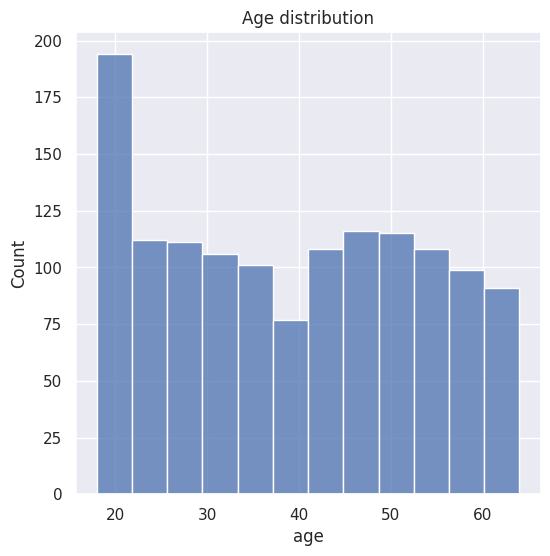

In [30]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['age'])
plt.title('Age distribution')
plt.show()

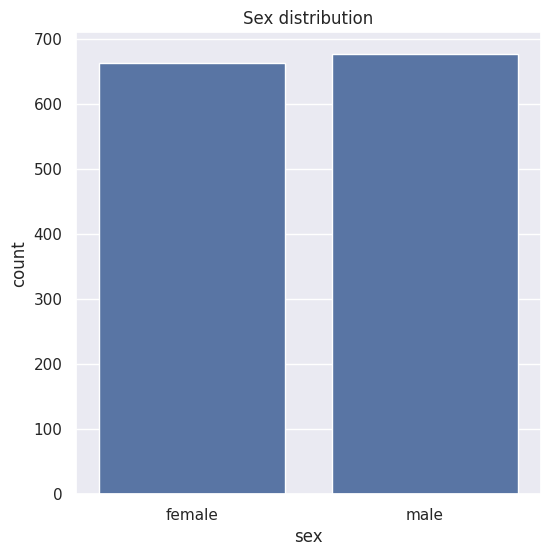

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data =df)
plt.title('Sex distribution')
plt.show()

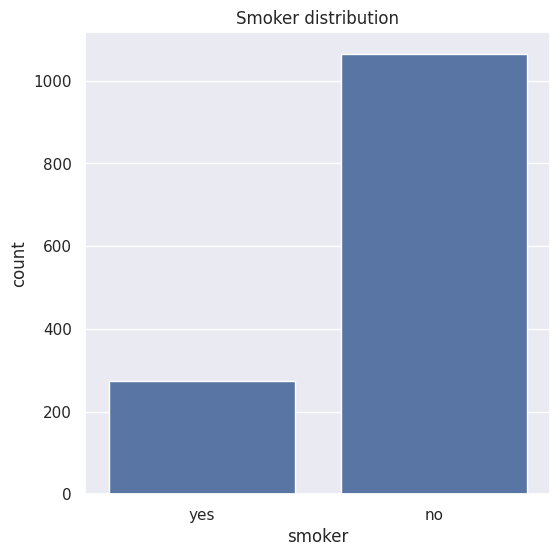

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data =df)
plt.title('Smoker distribution')
plt.show()

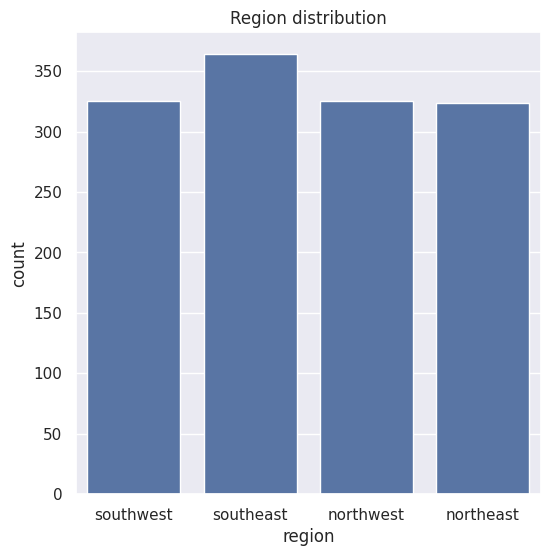

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data =df)
plt.title('Region distribution')
plt.show()

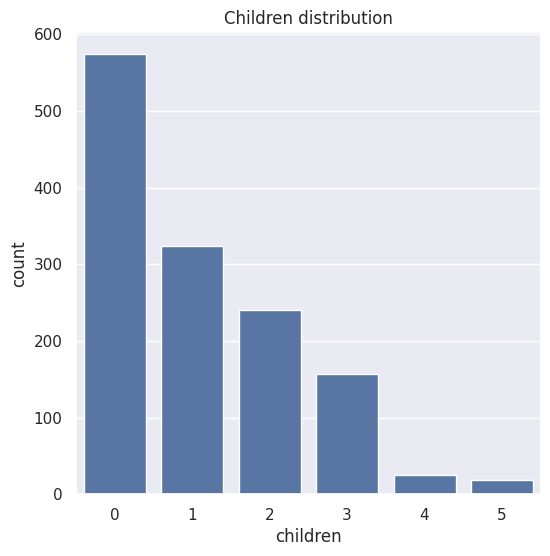

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data =df)
plt.title('Children distribution')
plt.show()

# Categorical features -
1.sex
2.smoker
3.region

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,4,5])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)
print(X.shape)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 0.0 ... 18 33.77 1]
 [0.0 1.0 0.0 ... 28 33.0 3]
 ...
 [1.0 0.0 0.0 ... 18 36.85 0]
 [1.0 0.0 0.0 ... 21 25.8 0]
 [1.0 0.0 1.0 ... 61 29.07 0]]
(1338, 20)


# Splitting the dataset into training and test data set


In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 3)

# Applying models

# Polynomial Regression ->

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
regressor = PolynomialFeatures(degree = 2)
X_new = regressor.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_new,y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(regressor.transform(X_test))

In [50]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7420870761484926


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 50, random_state = 3)
rfg.fit(X_train,y_train)

In [58]:
y_pred_2 = rfg.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_2))

0.8535750126667074


# XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor
br = XGBRegressor()
br.fit(X_train, y_train)

In [70]:
y_pred_3 = br.predict(X_test)

In [71]:
print(r2_score(y_test,y_pred_3))

0.8330585842002214
